### Incomplete, saved for the future use

In [6]:
import os
import sys
import argparse

sys.path.append("..")
from depth import Runner, PyTorchRunner
from danyrunner import DanyRunner

In [7]:
runners = {
	PyTorchRunner: [
		"dpt_hybrid_384",
		"dpt_large_384",
		"dpt_beit_large_512",
	],
	DanyRunner: [
		"vits14",
		"vitb14",
		"vitl14",
	],
}

len_runners = 0
for l in runners.values():
	for e in l:
		len_runners += 1

In [8]:
dirpath = "../tmp/tmp2"
images = os.listdir(dirpath)
images = [os.path.join(dirpath, e) for e in images if any(map(e.endswith, [".png", ".jpg"]))]

In [9]:
def process(input):
	outs = {}

	for runner_const, model_types in runners.items():
		runner = runner_const()
		
		for model_type in model_types:
			runner.load_model(model_type=model_type, optimize=True)

			out = runner.run_frame(input)
			outs[f"{runner_const}: {model_type}"] = out

	return outs

Initialize
device: cuda
Initialize
device: cuda
Loading model dpt_hybrid_384...
{'optimize'=True, 'height'=None, 'square'=None, 'strict'=True, 'aux_args'=None}
Model loaded, number of parameters = 123M
Loaded the model.
Loading model dpt_large_384...
{'optimize'=True, 'height'=None, 'square'=None, 'strict'=True, 'aux_args'=None}
Model loaded, number of parameters = 344M
Loaded the model.
Loading model dpt_beit_large_512...
{'optimize'=True, 'height'=None, 'square'=None, 'strict'=True, 'aux_args'=None}
Model loaded, number of parameters = 345M
Loaded the model.
Initialize
device: cuda
repo: LiheYoung/depth_anything_vits14
Total parameters: 24.79M
Loaded the model.
repo: LiheYoung/depth_anything_vitb14
Total parameters: 97.47M
Loaded the model.
repo: LiheYoung/depth_anything_vitl14
Total parameters: 335.32M
Loaded the model.


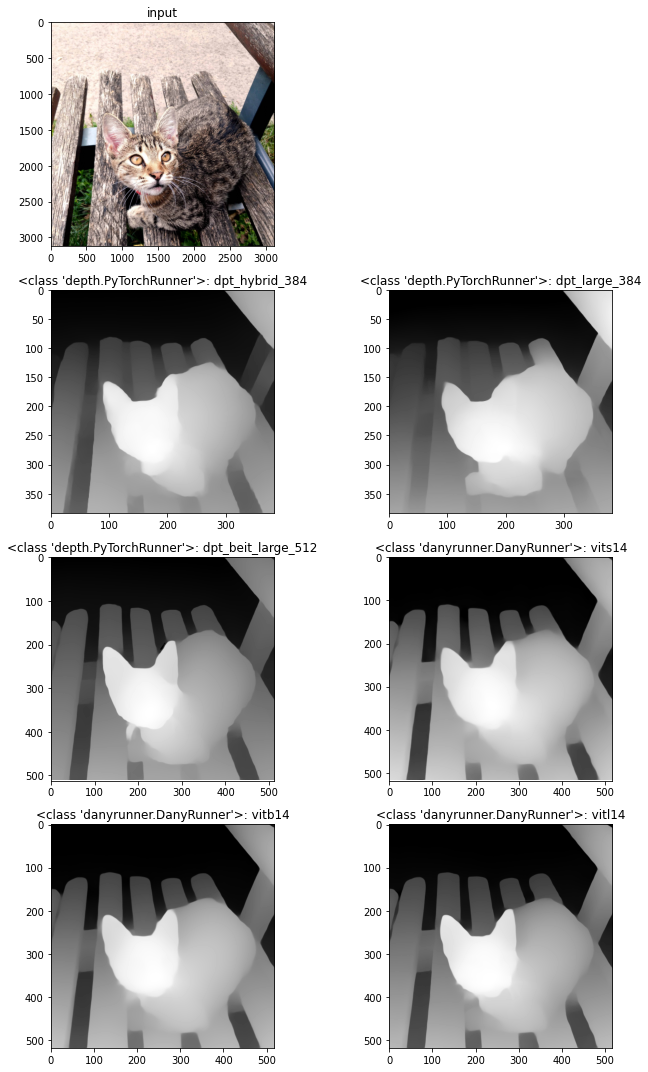

In [10]:
import math
import matplotlib.pyplot as plt
import cv2

count = len_runners
col = 2
row = math.ceil(count/2) + 1 #orig image in the first row

resize = True

def plot(i, im, title): #i starts with 1, a la `plt.subplot`
	x = i % 2
	y = i // 2
	ax = axs[y][x]

	ax.imshow(im, cmap="gray")
	ax.set_title(title)

#resize = True
resize = False
dummyrunner = PyTorchRunner()

for image_path in images:
	fig, axs = plt.subplots(row, col, figsize=(10, 15))
	fig.delaxes(axs[0][1])

	orig_img = dummyrunner.read_image(image_path)[0]
	plot(0, orig_img, "input")

	outs = process(orig_img)
	for idx, (key, output) in enumerate(outs.items()):
		to_plot = output
		if resize:
			to_plot = cv2.resize(to_plot, orig_img.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

		plot(2+idx, to_plot, key)

	plt.tight_layout()
	plt.show()